# W207 Final Project Anup Jha and Anish Phillip

## Members
* Anup Jha
* Anish Phillip  

## Project Title 

Facial Key Point Detection

## Description

* The objective of this project is to identify the location of facial keypoints on the images of face  
* There are 15 keypoints on the face such as :
- left_eye_center
- right_eye_cente
- left_eye_inner_corner
- left_eye_outer_corner
- right_eye_inner_corner
- right_eye_outer_corner
- left_eyebrow_inner_end
- left_eyebrow_outer_end_
- right_eyebrow_inner_end
- right_eyebrow_outer_end
- nose_tip
- mouth_left_corner
- mouth_right_corne
- mouth_center_top_lip
- mouth_center_bottom_lip
* Each of the feature has X and Y co-ordinates 
* The image itself is 96 X 96 grayscale image 
 
## Features Available 
* The value of 9216 pixels of the image are available for each training example 
* The values of pixels vary from 0 to 255 

## Feature Engineering 
We intend to do the following feature engineering to make the predictions accurate
 * For Random forest and SVM regression we will include gaussian blurring 
 * Normalization of the pixel values to be scaled between 0 and 1 
 * Since we plan to use the neural nets for the predictions we don't focus much on feature engineering for neural nets but we will have dropouts of the neurons

## Expected Outcome
  * We plan to create a model which can predict the location of the key features in terms of pixel position 
  * The model will be fed a gray scale image of face of size 96X96 

## Algorithms    
  *  We plan to use :  
  - Random Forest regression
  - SVM regression
  - Fully connected neural network 
  - Convolutional neural network 

## Baseline 
 * For Baseline performance we will take the mean value of each keypoint as prediction and check the RMSE
    
## Data Set 
  * For the training set we have 7049 example rows but only 2140 examples have all the facial key points 
  * We will split the training set into training set and validation set
  * We have test set set with 1783 images of 96X96 pixel images for which we need to submit our predictions for the competition
  * The training set has 7049 X 31 shape
  * The last column has space separated values of pixels
    
## Hyper Paramaters 
  * For Random forest we will tune the number of estimators,max depth
  * For SVM regressor we will tune the regularization penalty 
  * For the neural nets we will tune the number of neurons in each layer 
  
## Dimension reduction 
 * For Random Forest and SVM regression we will consider PCA dimension reduction 

## Loss Function 
 * We would be using the RMSE error as output is a location of the keypoint and RMSE would be appropriate as it will give distance of the error   
 
## Data Augmentation
  
  * Since the training set would be low in number we would also flip the images to get more training data
 
 


In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import math


In [88]:
data_images = pd.read_csv("./facial_keypoint_detection_project_data/training.csv")
test_data_images = pd.read_csv("./facial_keypoint_detection_project_data/test.csv")

# Data Exploration

In [89]:
data_images.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


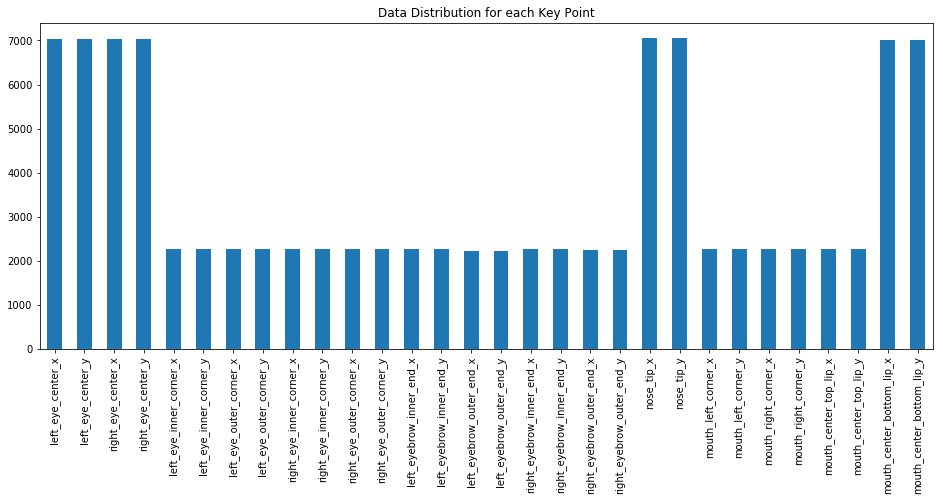

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [90]:
# We see that there are 30 columns for 15 locations ( X and Y ) 
# while last column contains pixel values for 96X96 image 
# let us see plot the counts
fig = plt.figure(figsize=(16,6))
data_images.describe().loc['count'].plot.bar()
plt.title("Data Distribution for each Key Point")
plt.show()
data_images.count()

In [91]:
data_images = data_images.dropna()
NPImage = data_images['Image'].apply(lambda pv: np.fromstring(pv,sep=' '))
X_raw = np.vstack(NPImage.values)
Y_raw = data_images[data_images.columns[:-1]].values

## Plot some images with key points

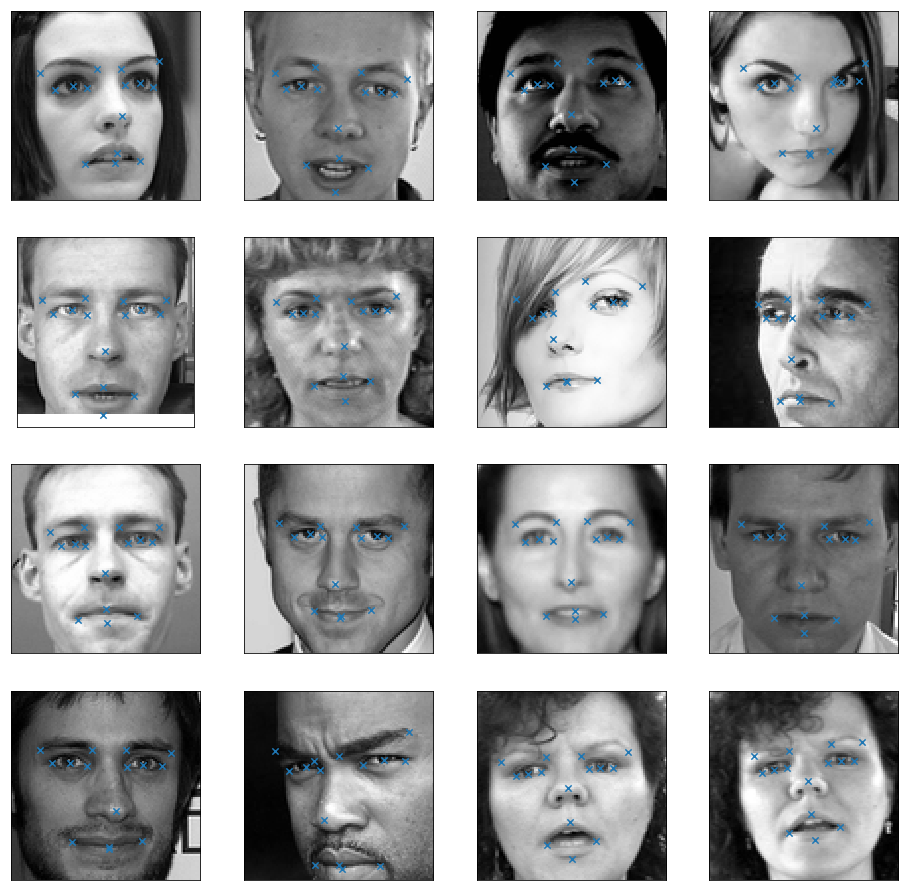

In [92]:
np.random.seed(0)
#Let us plot some training images and its key facial data points to look at the problem in hand
def plot_image(x,y,plot_axis):
    image = x.reshape(96,96)
    plot_axis.imshow(image,cmap='gray')
    plot_axis.scatter(y[0::2], y[1::2], marker='x', s=40)
fig = plt.figure(figsize=(16, 16))
random_index = np.random.randint(0,X_raw.shape[0],16)
for i,v in enumerate(random_index):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_image(X_raw[v],Y_raw[v],ax)
plt.show()  

We see from the images above that there are some images where the eyebrows are not fully visibe due to hair still the location is marked . These kind of samples would make learning even harder!

## Data Augmentation
  
We plan to augment the data by mirror imaging the data . Let us First check an example to see how would it look


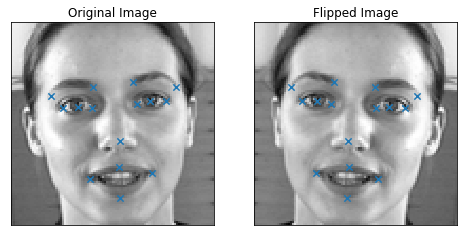

In [94]:
# We have seen from the data that there are 2140 examples. 
# So we want to augment data to have more training samples
# oneway to do that is to flip the images to make mirror images
# let us do that and plot one of the image in its real form and one in flipped form 
p=20
selected_image_X = X_raw[p]
selected_image_Y = Y_raw[p]
# to flip the image we first copy and then flip each row
selected_image_X_flip = X_raw[p].copy().reshape(96,96)
selected_image_X_flip = selected_image_X_flip[:,::-1,...]
selected_image_X_flip = selected_image_X_flip.ravel()
# We only need to flip the x axis of the keypoints
selected_image_Y_flip = selected_image_Y.copy()
selected_image_Y_flip[0:31:2] = 95 - selected_image_Y_flip[0:31:2]
#Also flip the left to right
flip_index_pairs = [(0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)]
for flipi in flip_index_pairs:
    temp = selected_image_Y_flip[flipi[0]]
    selected_image_Y_flip[flipi[0]] = selected_image_Y_flip[flipi[1]]
    selected_image_Y_flip[flipi[1]] = temp
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_image(selected_image_X,selected_image_Y,ax)
ax.set_title("Original Image")
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_image(selected_image_X_flip,selected_image_Y_flip,ax)
ax.set_title("Flipped Image")
plt.show()  

## Data Set creation for training and Dev

In [95]:
# we see that only about 2140 rows have all 30 output columns with values
# we will drop the rows which have null values 
# We see that the training file image column has pixel value as space separated values 
# we will convert that into np array
# We also scale the image pixel values between 0 and 1 by dividing each by 255
# We also scale the location of each feature between -1 and 1 
# We also add the flipped images data 
# We create a function which returns the shuffled value for X and Y 
np.random.seed(0)
def getData():
    data_images = pd.read_csv("./facial_keypoint_detection_project_data/training.csv")
    data_images = data_images.dropna()
    data_images['Image'] = data_images['Image'].apply(lambda pv: np.fromstring(pv,sep=' '))    
    X_original = np.vstack(data_images['Image'].values)
    Y_original = data_images[data_images.columns[:-1]].values
    X_flip = X_original.copy()
    Y_flip = Y_original.copy()
    for n,data in enumerate(X_flip):
        X_flip_temp = X_flip[n].reshape(96,96)
        X_flip_temp = X_flip_temp[:,::-1,...]
        X_flip[n]   = X_flip_temp.ravel()
    
    Y_flip[:,0:31:2] = 95 - Y_flip[:,0:31:2]
    #print(Y_original[40])
    #print(Y_flip[40])
    flip_index_pairs = [(0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)]
    for flipi in flip_index_pairs:
        temp = Y_flip[:,flipi[0]].copy()
        Y_flip[:,flipi[0]] = Y_flip[:,flipi[1]]
        Y_flip[:,flipi[1]] = temp

   
    #print(Y_flip[40])
    #fig = plt.figure(figsize=(8, 4))
    #ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    #plot_image(X_original[40],Y_original[40],ax)
    #ax.set_title("Original Image")
    #ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    #plot_image(X_flip[40],Y_flip[40],ax)
    #ax.set_title("Flipped Image")

    # normalize the data between 0 and 1
    X = np.vstack((X_original,X_flip))/255
    # normalize Y value between -1 and 1
    Y = (np.vstack((Y_original,Y_flip)) - 48)/48
    shuffle = np.random.permutation(np.arange(X.shape[0]))
    X, Y = X[shuffle], Y[shuffle]
    return X,Y

X,Y = getData()
X_train = X[:math.ceil(X.shape[0]*.8)]
Y_train = Y[:math.ceil(Y.shape[0]*.8)]
X_dev   = X[math.ceil(X.shape[0]*.8):]
Y_dev   = Y[math.ceil(Y.shape[0]*.8):]
print("Train Data Shape : ", X_train.shape)
print("Train Y Shape : ",Y_train.shape)
print("Dev Data Shape : ", X_dev.shape)
print("Dev Y Shape :", Y_dev.shape) 

Train Data Shape :  (3424, 9216)
Train Y Shape :  (3424, 30)
Dev Data Shape :  (856, 9216)
Dev Y Shape : (856, 30)


## Baseline
Now let us create base line. In the baseline we are going to take average of the co-ordinates as predicted value and caluclate the RMSE for dev set using the average as prediction

Base Line RMSE = 0.093240 
We have normalized the predicted value between -1,1 so original baseline RMSE is 48 X RMSE = 4.475508


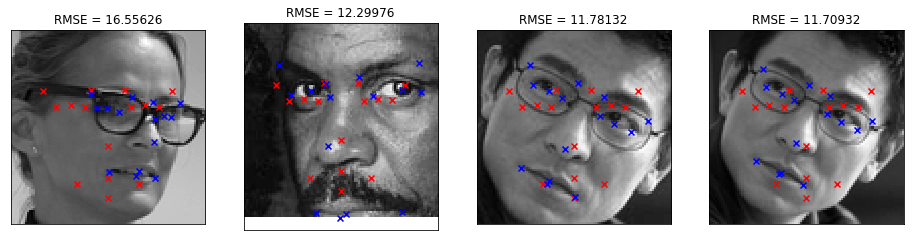

In [96]:
Y_baseLine_predictions = np.mean(Y_train,axis=0)
base_line_RMSE = np.sqrt(np.sum(np.square(Y_baseLine_predictions-Y_dev))/(Y_dev.shape[0]*15))
print("Base Line RMSE = %.6f "%(base_line_RMSE))

print("We have normalized the predicted value between -1,1 so original baseline RMSE is 48 X RMSE = %.6f"\
      %(base_line_RMSE*48))
base_line_RMSE_eachexample = np.sqrt(np.sum(np.square(Y_baseLine_predictions-Y_dev),axis=1)/15)
#Let us plot 4 dev set images with most RMSE 
#print(base_line_RMSE_eachexample[np.argsort(base_line_RMSE_eachexample,axis=0)[-4:]][::-1])

#print(np.argsort(base_line_RMSE_eachexample,axis=0)[-4:][::-1])
#print(base_line_RMSE_eachexample[784])
fig = plt.figure(figsize=(16, 4))
count = 1
for i in np.argsort(base_line_RMSE_eachexample,axis=0)[-4:][::-1] :
    ax = fig.add_subplot(1, 4, count, xticks=[], yticks=[])
    ax.imshow((X_dev[i]).reshape(96,96),cmap='gray')
    ax.scatter(Y_baseLine_predictions[0::2]*48+48, 
               Y_baseLine_predictions[1::2]*48+48,marker='x',color='red')
    ax.scatter(Y_dev[i][0::2]*48+48, 
               Y_dev[i][1::2]*48+48,marker='x',color='blue')
    ax.set_title("RMSE = %.5f"%(base_line_RMSE_eachexample[i]*48))
    count +=1
plt.show()  

